# Memory benchmark

## Run the benchmark

First of all we need to run the benchmark.

In [1]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:../../../install/bin"

In [2]:
!run memcpy_bench > data.csv

## Load the data

In [3]:
# import the data file

import pandas as pd

df = pd.read_csv("data.csv", skipinitialspace=True)

In [6]:
# import the data file

import pandas as pd

df = pd.read_csv("setonix.csv", skipinitialspace=True)

In [7]:
df 

,Data Type,Array Length,Host Memory Type,Size (Bytes),Direction,GPU Model,Hostname,Wall Time (s),Bandwidth (GB/s)
0,real32,50,pageable,200,h2d,gfx90a,nid002158,0.002145,0.000093
1,real32,50,pageable,200,d2h,gfx90a,nid002158,0.000010,0.019530
2,real32,50,pinned,200,h2d,gfx90a,nid002158,0.000005,0.040650
3,real32,50,pinned,200,d2h,gfx90a,nid002158,0.000005,0.040320
4,real64,25,pageable,200,h2d,gfx90a,nid002158,0.000005,0.037810
...,...,...,...,...,...,...,...,...,...
403,real32,500000,pinned,2000000,d2h,gfx90a,nid002158,0.000082,24.410000
404,real64,250025,pageable,2000200,h2d,gfx90a,nid002158,0.000175,11.450000
405,real64,250025,pageable,2000200,d2h,gfx90a,nid002158,0.000176,11.340000
406,real64,250025,pinned,2000200,h2d,gfx90a,nid002158,0.000084,23.670000


## Plot the data

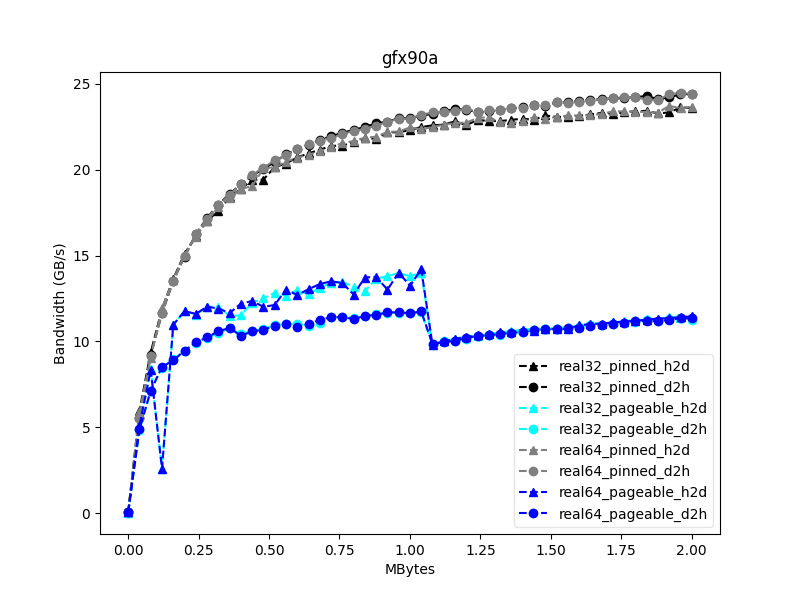

In [8]:
# Importing Matplotlib
import matplotlib

%matplotlib widget

# Now 
from matplotlib import pyplot as plt

[fig, ax] = plt.subplots(figsize=(8, 6))

colours = {"pinned_real32" : "black",
           "pinned_real64" : "grey",
           "pageable_real32" : "cyan",
           "pageable_real64" : "blue"}

for dtype in ["real32", "real64"]:
    for memtype in ["pinned", "pageable"]:
        for direction, marker in zip(["h2d", "d2h"], ["^","o"]):
            col = colours[f"{memtype}_{dtype}"]
            selector = (df["Data Type"] == dtype) & (df['Host Memory Type'] == memtype) & (df["Direction"] == direction)
            ax.plot(df[selector]["Size (Bytes)"]/1e6, df[selector]["Bandwidth (GB/s)"], f'--{marker}', color=col, label=f"{dtype}_{memtype}_{direction}")

ax.set_title(df["GPU Model"][0])
ax.set_xlabel("MBytes")
ax.set_ylabel("Bandwidth (GB/s)")
ax.legend(loc=0, fancybox=True, framealpha=0.5)